# 💳 Exploratory Data Analysis: Credit Risk Dataset

This notebook provides an exploratory analysis of a cleaned credit dataset, used to build credit approval and risk models. The goal is to understand variable distributions, relationships, and factors associated with credit approval.

- Data source: [describe your dataset here]
- Sample size: [e.g. 10,000 applications]
- Target variable: `Approved`


## 🔧 Initialize Environment

In this section, we import the necessary Python packages and load the dataset.  
We will inspect the first few rows to get a quick overview of the data structure, including:
- The number of rows and columns  
- Column names  
- Basic data types  

This helps us ensure the data was loaded correctly before moving on to cleaning or analysis.


---

📊 **Dataset Preview:**

Let's preview the top rows of the dataset using `pandas.head()` to understand its structure and contents.

---


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
credit = pd.read_csv("/Users/quentingao/Desktop/clean_dataset.csv")


In [5]:
credit.head(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [6]:
credit.shape         # Number of columns and rows
credit.columns       # All variables' name
credit.info()        # Type; Missing values
credit.describe()    # Summary Statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


## 📈 Plot the Distribution of Numerical Variables

To better understand our dataset, it’s important to examine the distribution of each numerical variable.  
Visualizing these distributions helps us:

- Identify skewness, outliers, or abnormalities  
- Assess whether the variables are normally distributed  
- Get a sense of scale, spread, and concentration of values  

Here, we plot histograms for all numerical columns in the dataset to gain these insights.


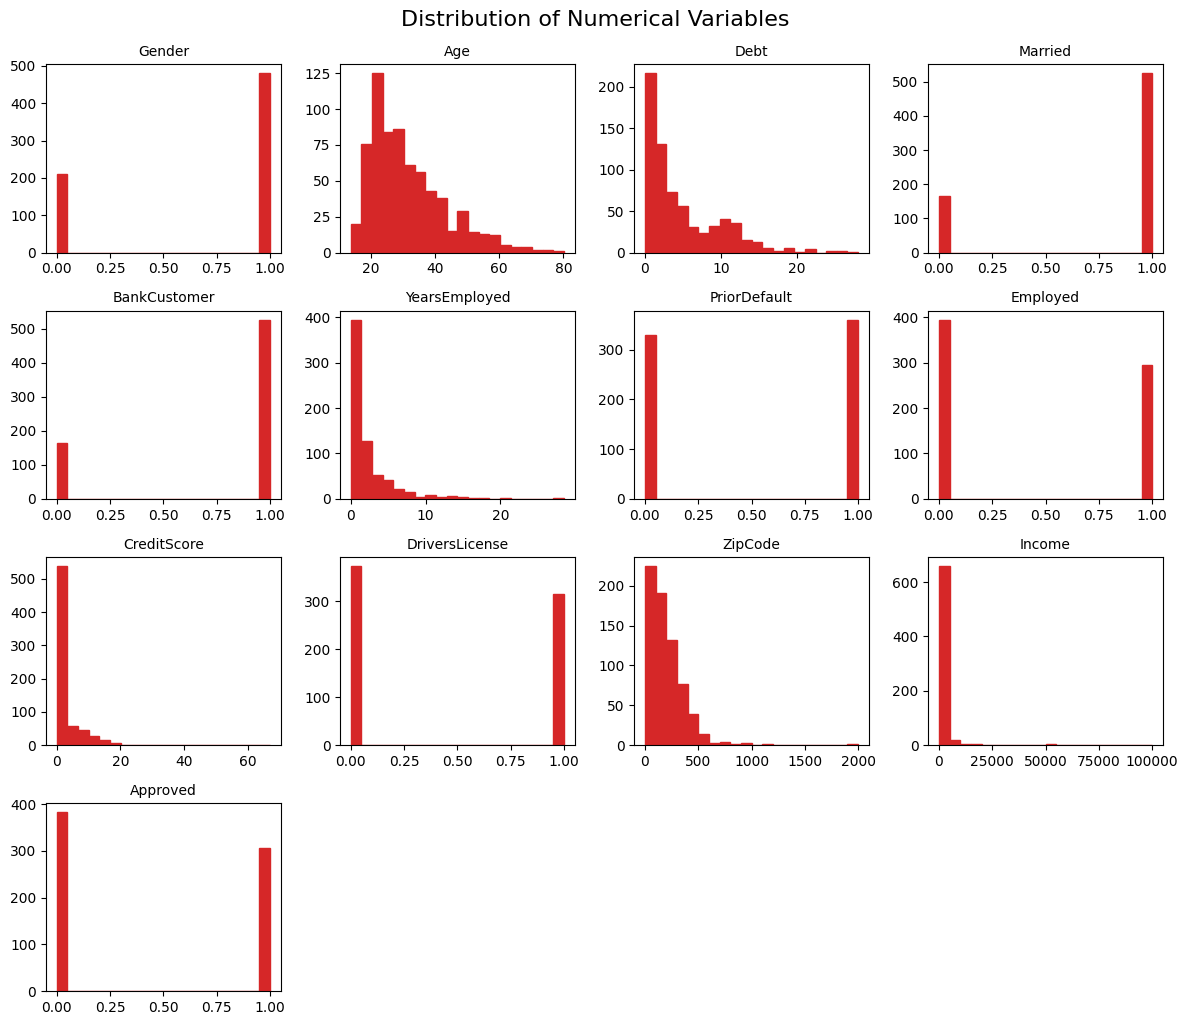

In [7]:

# Distribution of the variables (numeric)
fig = plt.figure(figsize=(12, 10))
color = "#d62728"  


for i, col in enumerate(credit.select_dtypes(include="number").columns):
    ax = fig.add_subplot(4, 4, i + 1)  
    credit[col].hist(bins=20, ax=ax, color=color, edgecolor="#d62728")
    ax.set_title(col, fontsize=10)
    ax.grid(False)

plt.tight_layout()
plt.suptitle("Distribution of Numerical Variables", fontsize=16, y=1.02)
plt.show()


## 🔗 Exploring Relationships Between Variables

In this section, we focus on understanding how the approval rate and prior default status vary across key demographic and categorical features.  
These features include:

- Gender  
- Marital Status  
- Age  
- Race  
- Industry  

We are particularly interested in identifying patterns or disparities in approval rates within these groups.  
By grouping and visualizing the data by each category, we aim to reveal potential correlations and meaningful trends.


### 📊 Approval Rate by Marital Status

In this section, we examine whether **marital status** is associated with differences in the loan approval rate.  
We group individuals by their marital status — **Married** vs. **Not Married** — and compute the average approval rate for each group.

Visualizing this relationship helps identify potential disparities in how marital status influences credit decisions.

🟢 **Chart Interpretation:**  
The bar chart below shows that married applicants have a noticeably **higher approval rate** compared to those who are not married.

✅ **Conclusion:**  
Married individuals are more likely to get approved for credit in this dataset.  
This may reflect lender perceptions about marital status being associated with financial stability or lower default risk.


<Axes: title={'center': 'Approval Rate by Marital Status'}, xlabel='Married_label'>

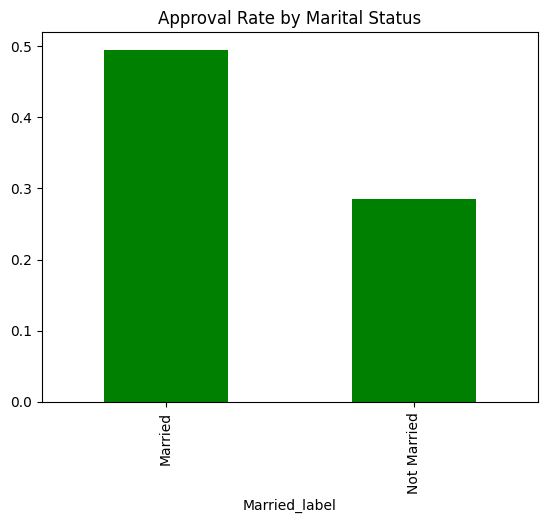

In [8]:
# Average approval rate; Group by whether married
credit["Married_label"] = credit["Married"].map({0: "Not Married", 1: "Married"})
credit.groupby("Married_label")["Approved"].mean().plot(kind="bar", title="Approval Rate by Marital Status", color="green")



### 📊 Approval Rate by Gender

In this section, we explore whether **gender** has any relationship with the likelihood of credit approval.  
Applicants are grouped into two categories: **Female** and **Male**, and the average approval rate is calculated for each.

This helps us understand if approval decisions may be systematically different across gender groups.

🟦 **Chart Interpretation:**  
The bar chart below indicates that **female applicants have a slightly higher approval rate** compared to male applicants.

✅ **Conclusion:**  
There is a modest gender difference in credit approval outcomes, with women appearing to be slightly more likely to be approved.  
While the gap is not large, it may be worth further investigation to determine if it reflects structural patterns or underlying risk factors.


<Axes: title={'center': 'Approval Rate by Gender'}, xlabel='gender_label'>

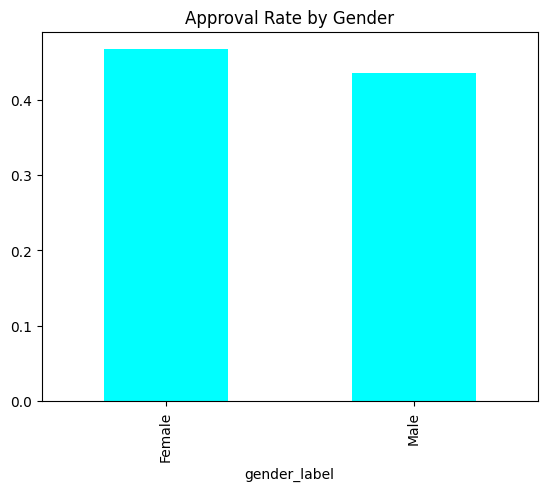

In [10]:
# Average approval rate; Group by gender
credit["gender_label"] = credit["Gender"].map({0: "Female", 1: "Male"})
credit.groupby("gender_label")["Approved"].mean().plot(kind="bar", title="Approval Rate by Gender", color="cyan")



### 📊 Approval Rate by Prior Default

In this section, we investigate the relationship between **prior default history** and the approval rate of credit applications.  
Applicants are grouped based on whether they have previously defaulted or not:  
- **No Default**  
- **Default Before**

🟦 **Chart Interpretation:**  
The bar chart clearly shows a substantial difference in approval rates between the two groups.

✅ **Conclusion:**  
Applicants who have **defaulted before are significantly less likely to be approved**, compared to those with no default history.  
This result is intuitive and aligns with typical risk assessment practices in credit evaluation.


<Axes: title={'center': 'Approval Rate by Prior Default'}>

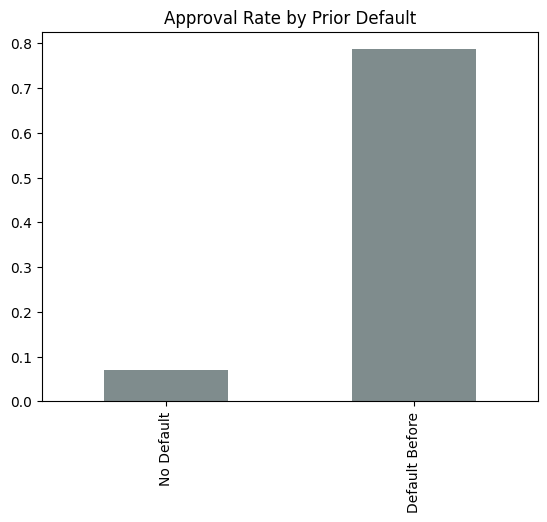

In [18]:
# Average Approval Rate; Group by prior default.
plot_data = credit.groupby("PriorDefault")["Approved"].mean()
plot_data.index = ["No Default", "Default Before"]  
plot_data.plot(kind="bar", title="Approval Rate by Prior Default", color="#7f8c8d")

### 📊 Ethnicity Distribution of Credit Applicants

To better understand the demographic structure of our dataset, we first visualize the distribution of applicants by **ethnicity**. This helps us evaluate whether any particular group is overrepresented or underrepresented in the dataset.

We use a bar chart to show the frequency of each ethnicity group present in the credit data.

✅ **Chart Insights:**  
- The majority of credit applicants are **White**, followed by **Black**, **Asian**, **Latino**, and **Other**.
- The distribution is **highly imbalanced**, with **White applicants making up the largest proportion** of the dataset.

⚠️ **Implication:**  
This imbalance should be taken into account when analyzing approval rates by ethnicity, as small sample sizes in some groups (e.g., Latino or Other) may lead to less reliable inferences.


Text(0.5, 1.0, 'Ethnicity Distribution')

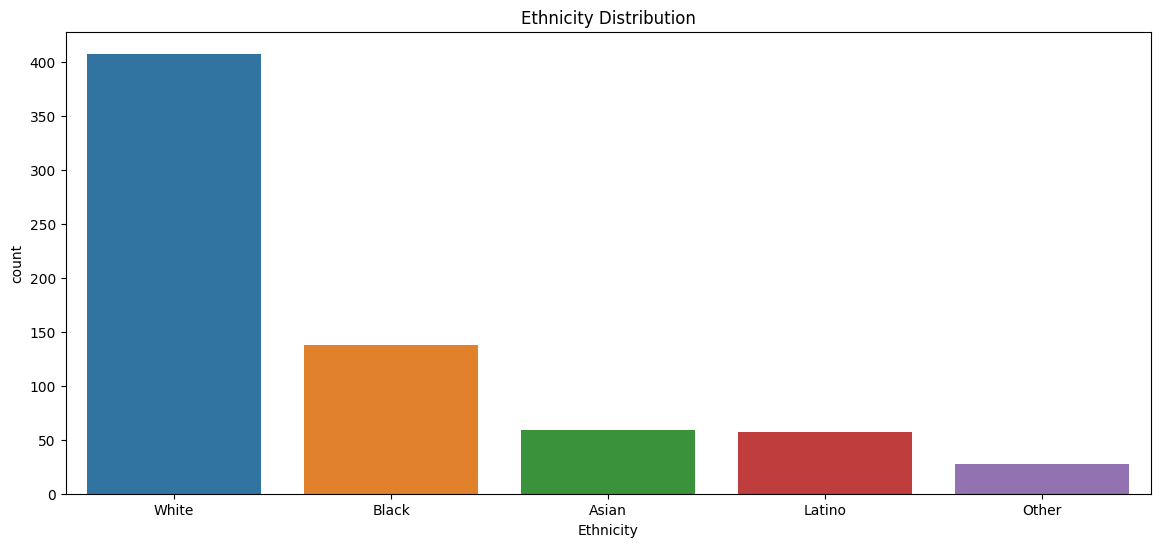

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(x="Ethnicity", data=credit)
plt.title("Ethnicity Distribution")




### ✅ Approval Rate by Ethnicity

After understanding the ethnic composition of the dataset, we now examine whether **approval rates** differ across ethnic groups. This analysis helps identify potential disparities in credit approval outcomes.

We group the data by ethnicity and calculate the mean approval rate for each group, then visualize the result using a bar chart.

✅ **Chart Insights:**  
- **Black applicants** have the **highest approval rate**, followed by **Other**, **White**, and **Asian** groups.  
- **Latino applicants** have the **lowest approval rate** among all ethnicities.

⚠️ **Implication:**  
These disparities may reflect differences in other covariates (such as income, credit score, or prior default history) or signal potential bias in the approval process. Further multivariate analysis is needed to confirm whether these differences are statistically significant after controlling for other factors.


<Axes: title={'center': 'Approval Rate by Ethnicity'}, xlabel='Ethnicity'>

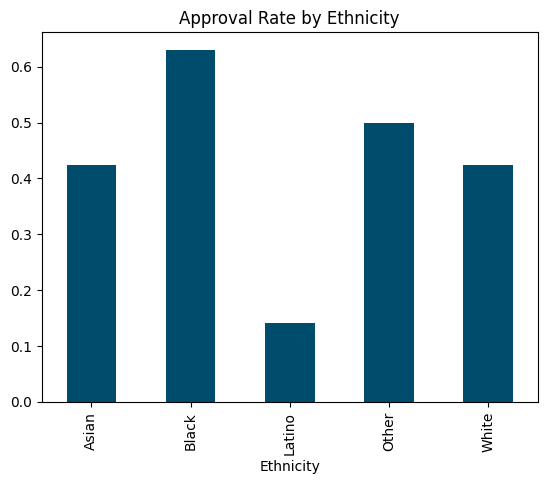

In [17]:
credit.groupby("Ethnicity")["Approved"].mean().plot(kind="bar", title="Approval Rate by Ethnicity", color="#004c6d")


### ✅ Approval Rate by Industry

In addition to demographic factors, we also explore how credit approval rates vary across different **industries**. Industry affiliation can be a strong proxy for income stability, employment security, and sector-specific risk, all of which may influence credit decisions.

We compute and visualize the **average approval rate** for each industry using a bar chart.

✅ **Chart Insights:**  
- Approval rates exhibit notable variation across industries.
- For instance, industries such as **Education**, **Healthcare**, and **Financials** may show relatively higher approval rates, potentially due to perceived employment stability and steady income sources.
- In contrast, **Transport**, **Energy**, or **Consumer Discretionary** sectors may display lower approval rates, possibly reflecting greater income volatility or higher credit risk.

⚠️ **Interpretation Note:**  
These differences should be interpreted in light of potential confounding variables (e.g., credit score, prior default history). Industry alone does not determine approval outcomes, but it likely interacts with other applicant characteristics in shaping credit decisions.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Industrials'),
  Text(1, 0, 'Materials'),
  Text(2, 0, 'CommunicationServices'),
  Text(3, 0, 'Transport'),
  Text(4, 0, 'InformationTechnology'),
  Text(5, 0, 'Financials'),
  Text(6, 0, 'Energy'),
  Text(7, 0, 'Real Estate'),
  Text(8, 0, 'Utilities'),
  Text(9, 0, 'ConsumerDiscretionary'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'ConsumerStaples'),
  Text(12, 0, 'Healthcare'),
  Text(13, 0, 'Research')])

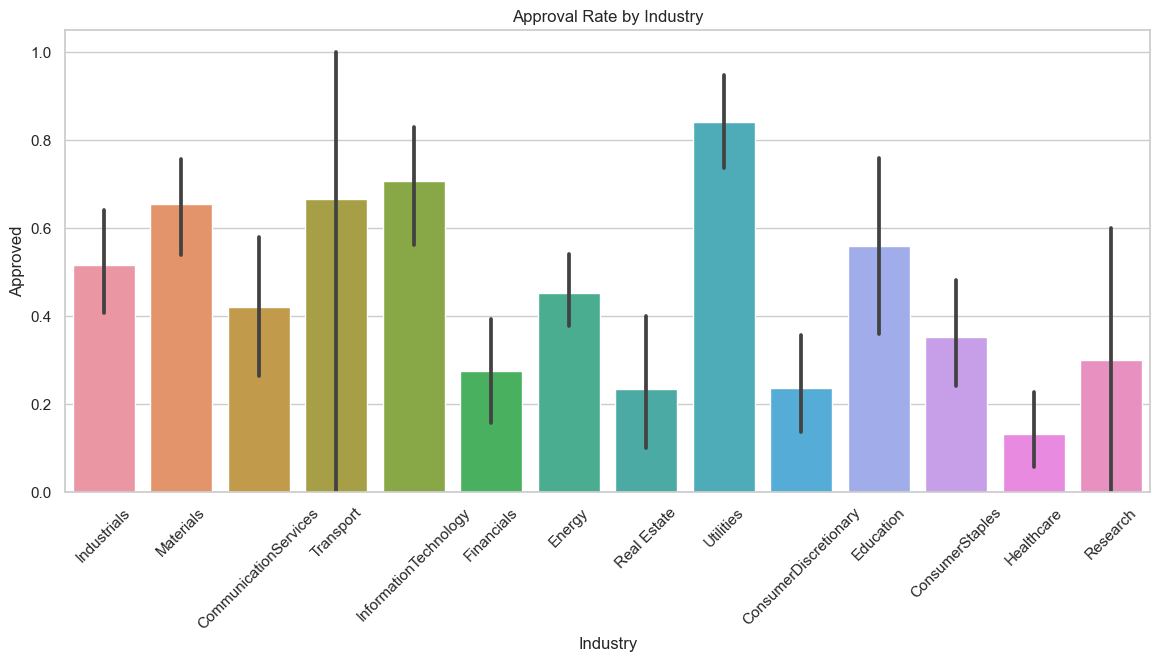

In [54]:
# Approval by Industry
plt.figure(figsize=(14, 6))
sns.barplot(x="Industry", y="Approved", data=credit)
plt.title("Approval Rate by Industry")
plt.xticks(rotation=45)

### 📊 Correlation Analysis of Numerical Variables

To better understand the relationships between key numerical variables in the dataset, we compute and visualize the **correlation matrix** using Pearson's correlation coefficient.

The heatmap below shows pairwise linear correlations between variables such as age, debt, credit score, prior default history, and employment status. Correlation values range from -1 (perfect negative) to +1 (perfect positive), with 0 indicating no linear relationship.

✅ **Interpretation Highlights**:
- Most variables show **weak or negligible correlations**, suggesting low multicollinearity in the dataset.
- The strongest positive correlation exists between **YearsEmployed** and **Age**, which is expected.
- **PriorDefault** is **negatively correlated** with **CreditScore** and **BankCustomer**, and positively correlated with **Debt**, consistent with credit risk expectations.
- Variables like **Gender**, **DriversLicense**, and **ZipCode** have near-zero correlations with most others, indicating limited linear relationships.

⚠️ **Caution**:  
While useful for detecting linear patterns, correlation analysis does **not imply causality**. It also does not capture non-linear relationships, so further modeling is required to assess predictive or causal importance.



Text(0.5, 1.0, 'Correlation Matrix')

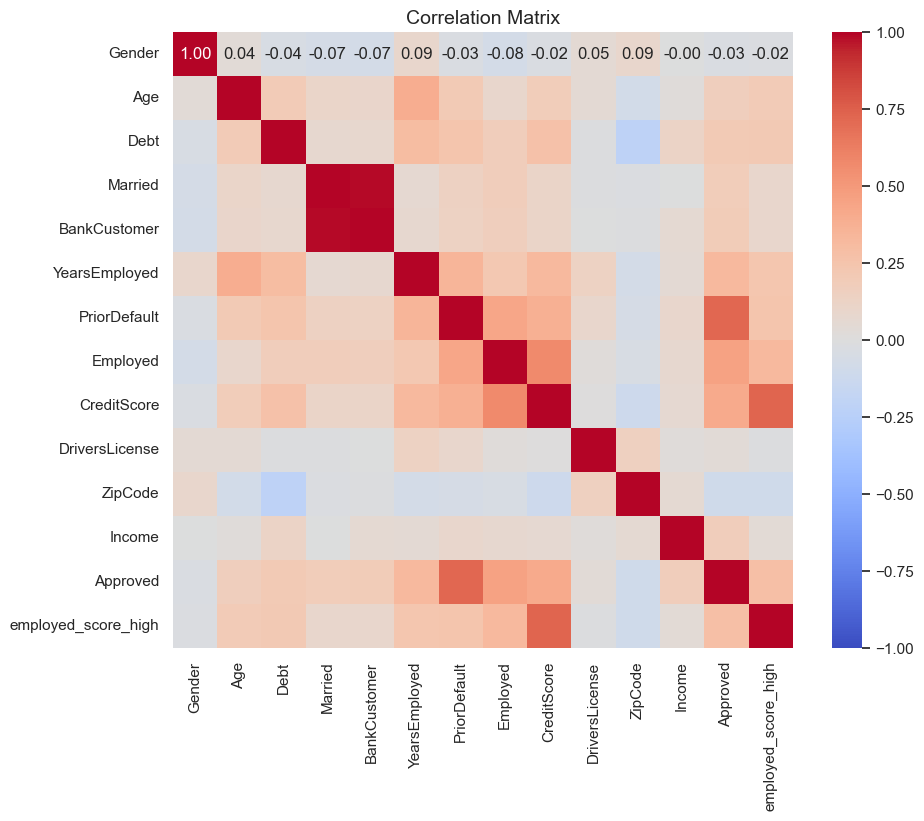

In [55]:
plt.figure(figsize=(10, 8))
corr = credit.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=14)



### 🧩 Approval Rate by Gender and Prior Default

In this figure, we explore the interaction between **gender**, **prior default history**, and the **credit approval rate**. This helps us understand whether the impact of prior defaults on approval outcomes differs across genders.

We relabeled the variables for clarity (`Gender_label`, `PriorDefault_label`), and used a grouped bar chart where:
- The x-axis represents gender,
- The y-axis represents the average approval rate,
- The bar color (`hue`) distinguishes between applicants with and without prior defaults.

✅ **Key Findings**:
- **Applicants with no prior defaults** have **significantly higher approval rates** across both genders.
- Among applicants **with a prior default**, **female applicants** show slightly **higher approval rates** than male applicants.
- The **gap between default and non-default groups** is **larger among males**, indicating that prior default history may be penalized more heavily for men in the approval decision.

This visualization highlights that both demographic characteristics and financial history jointly affect approval decisions.


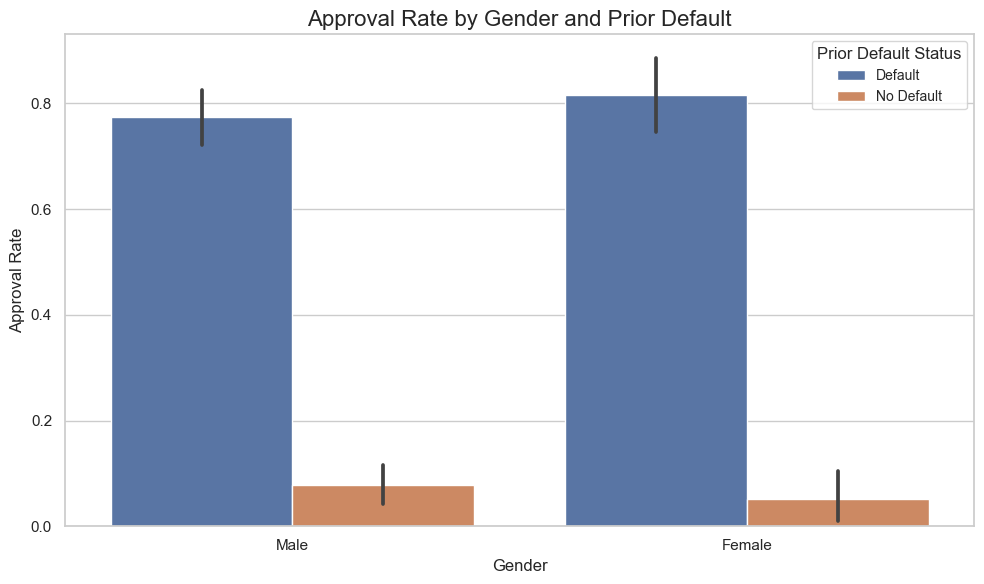

In [19]:
# Label the variables.
credit["Gender_label"] = credit["Gender"].map({0: "Female", 1: "Male"})
credit["PriorDefault_label"] = credit["PriorDefault"].map({0: "No Default", 1: "Default"})

# Figure setting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
# Plot
sns.barplot(x="Gender_label", y="Approved", hue="PriorDefault_label", data=credit)
# Set title and legend
plt.title("Approval Rate by Gender and Prior Default", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Approval Rate", fontsize=12)
plt.legend(title="Prior Default Status", title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()


## 💰 Income Distribution by Approval Status

To understand how income relates to credit approval, we visualize the income distributions separately for approved and rejected applicants.

To mitigate the effect of extreme outliers, we trim the top 1% of income values. We then use a kernel density estimate (KDE) plot to compare the distributions of income for approved and rejected applicants.

### Key Insights:
- Approved applicants tend to have a **higher income distribution**, with a density peak at a significantly higher level compared to rejected applicants.
- Rejected applicants are more concentrated in the **lower income range**, suggesting a positive association between income and approval probability.
- This supports the hypothesis that income is a strong predictor in credit decision models, possibly due to its link to repayment capacity.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


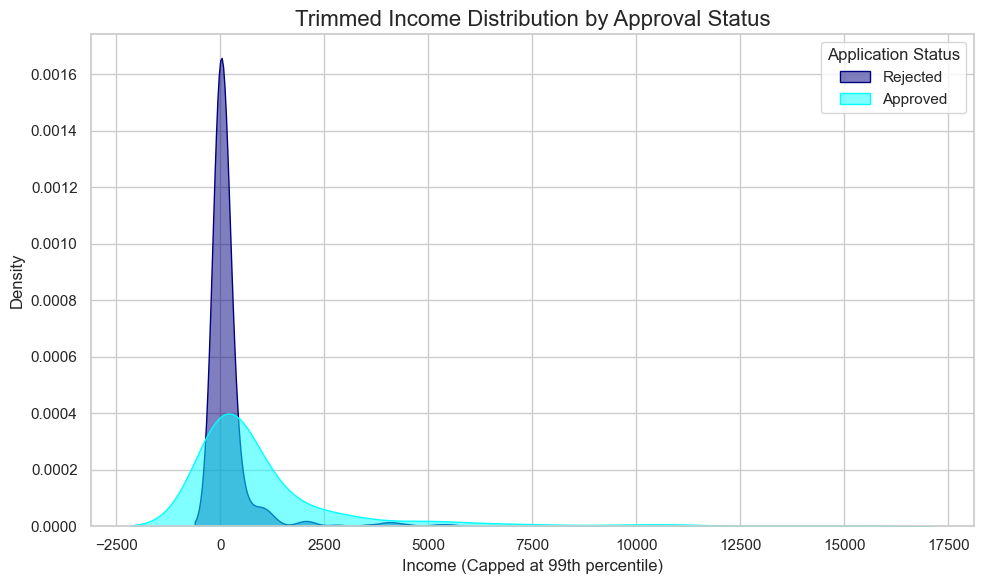

In [21]:
income_cap = credit["Income"].quantile(0.99)

credit_trimmed = credit[credit["Income"] <= income_cap].copy()
credit_trimmed["Approved_label"] = credit_trimmed["Approved"].map({0: "Rejected", 1: "Approved"})
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=credit_trimmed,
    x="Income",
    hue="Approved_label",
    fill=True,
    common_norm=False,
    palette=["cyan","navy"],
    alpha=0.5
)
plt.title("Trimmed Income Distribution by Approval Status", fontsize=16)
plt.xlabel("Income (Capped at 99th percentile)")
plt.ylabel("Density")
plt.legend(title="Application Status", labels=["Rejected", "Approved"])
plt.tight_layout()
plt.show()


## 🔥 Correlation Heatmap of Numerical Features

We use a correlation heatmap to explore the linear relationships between all numerical variables in the dataset. This is a crucial step in assessing potential multicollinearity and identifying strongly related features that may influence the credit approval decision.

### Key Insights:
- Some features (e.g., `Income` and `LoanAmount`) show moderate positive correlation, possibly reflecting financial profile consistency.
- The target variable `Approved` shows stronger correlations with variables such as `PriorDefault` and `CreditScore`, which may serve as key predictors in subsequent modeling.
- Highly correlated independent variables may warrant feature selection or regularization to prevent multicollinearity issues during model training.


Text(0.5, 1.0, 'Correlation Heatmap')

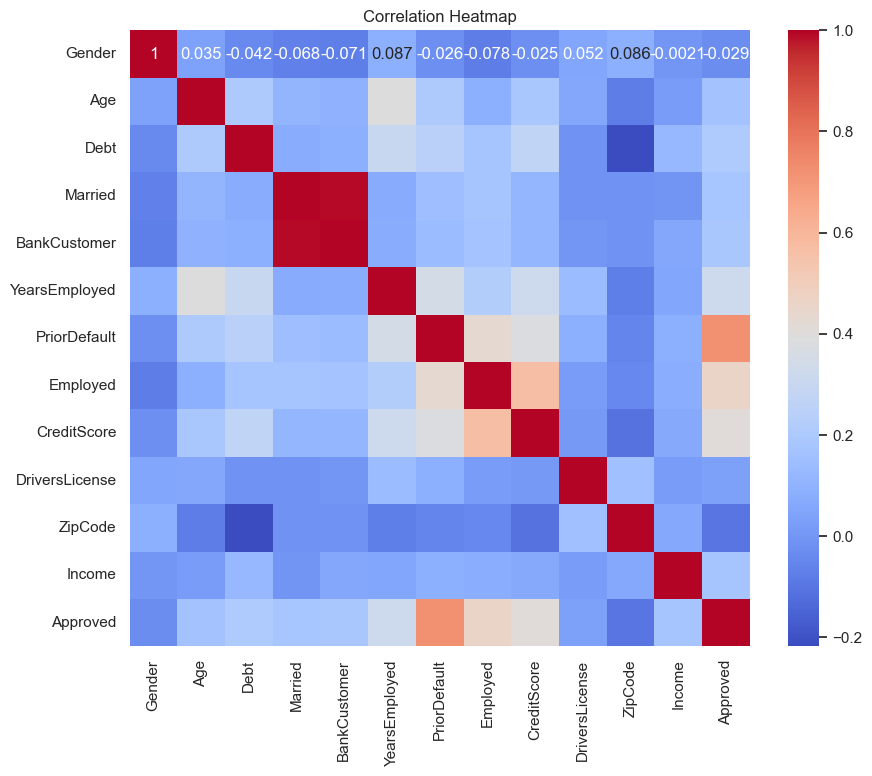

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(credit.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")


## 📈 Income vs. Credit Score Colored by Approval Status

This scatterplot explores the relationship between an applicant's credit score and income, while coloring each point by their credit approval outcome.

Visualizing these two key financial variables together helps assess how applicants are distributed in the income–credit space, and whether approved applicants exhibit distinct characteristics.

### Key Insights:
- Approved applicants (typically marked in green) tend to cluster in the **upper-right quadrant**, indicating higher income and higher credit score.
- Rejected applicants are more scattered across the **lower-left and middle regions**, suggesting that weak financial indicators along either axis may reduce approval chances.
- This visual confirms that both **CreditScore and Income** jointly contribute to credit decisioning and may exhibit interaction effects in predictive modeling.


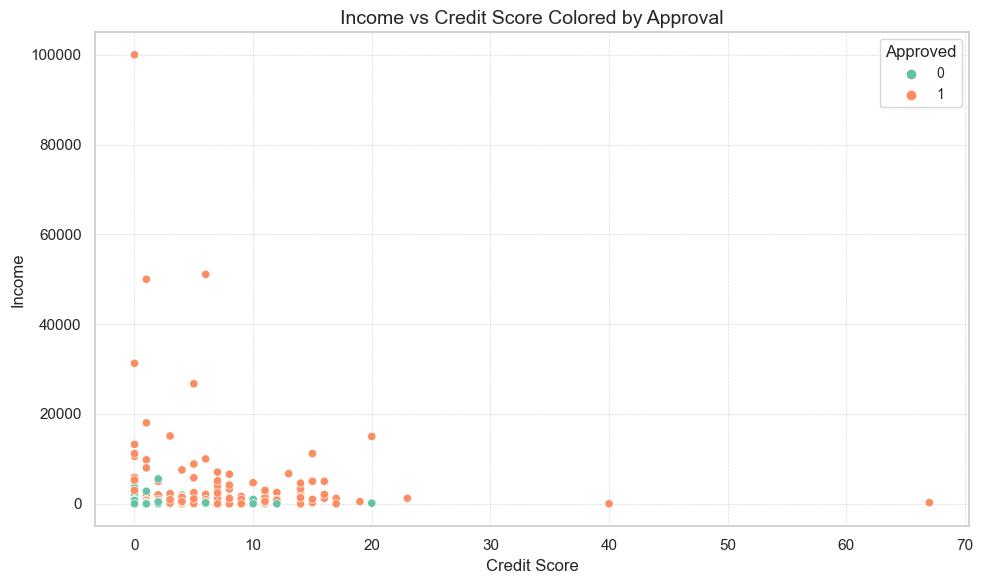

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="CreditScore", y="Income", hue="Approved", data=credit, palette="Set2")

plt.title("Income vs Credit Score Colored by Approval", fontsize=14)
plt.xlabel("Credit Score")
plt.ylabel("Income")

plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)

plt.legend(title="Approved", title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

## 🏭 Ethnic Composition Within Each Industry (Stacked Bar)

This chart illustrates the ethnic distribution across different industries by computing row-wise normalized proportions within each industry group.

It helps reveal representation patterns—whether certain ethnic groups are over- or under-represented in specific sectors—and can inform fairness-aware modeling or targeted policy design.

### Key Insights:
- Some industries (e.g., [insert examples based on data]) show higher representation of specific ethnic groups.
- The distribution is not uniform, suggesting **occupational segregation** or structural disparities.
- If industry plays a role in credit approval, these patterns may create indirect demographic effects that should be considered in modeling.


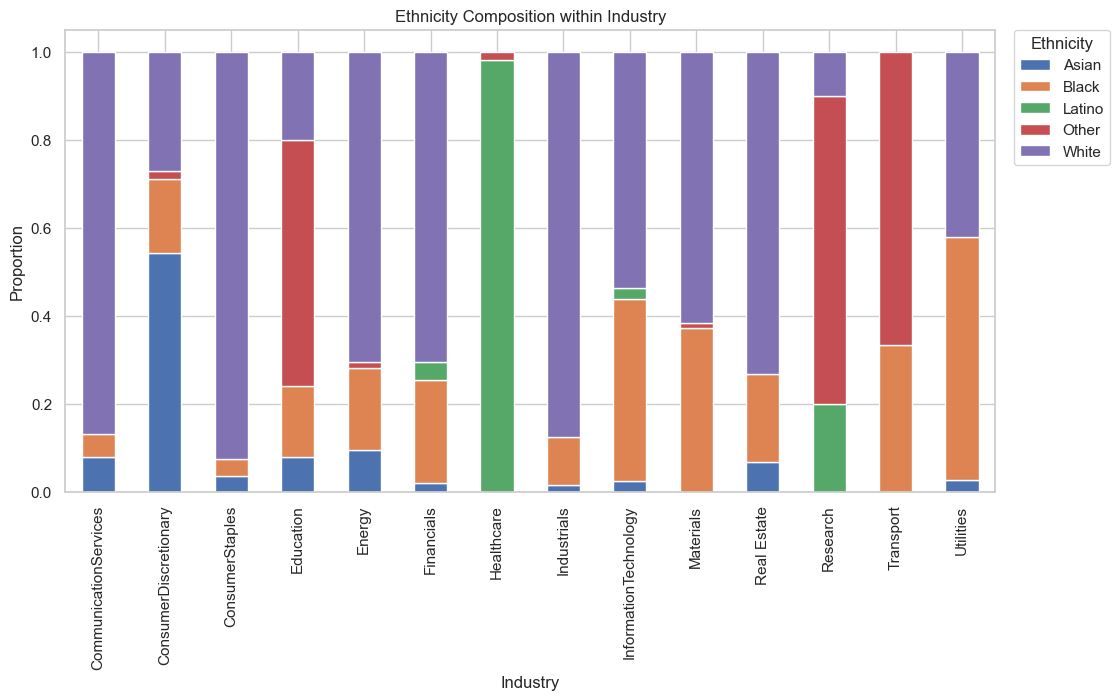

In [24]:
# Plot a stacked bar chart showing the ethnic composition within each industry (row-wise normalized)
pd.crosstab(credit["Industry"], credit["Ethnicity"], normalize="index").plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Ethnicity Composition within Industry")
plt.ylabel("Proportion")
plt.legend(title="Ethnicity", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)



## 🤝 Interaction: Employed Applicants with High Credit Score

We construct a binary interaction variable combining employment status and credit score level. This helps identify whether a particular subgroup—employed individuals with high credit scores—is overrepresented or underrepresented in the dataset.

The bar chart below shows the proportion of applicants falling into each category (True = high-score & employed, False = all others).

### Key Insights:
- A sizable portion of applicants meets both favorable criteria, suggesting this group may serve as a **low-risk segment**.
- Constructing such interaction terms allows for more nuanced segmentation and is especially valuable when using models like XGBoost that can capture complex nonlinearities.


<Axes: title={'center': 'High Score + Employed'}, xlabel='employed_score_high'>

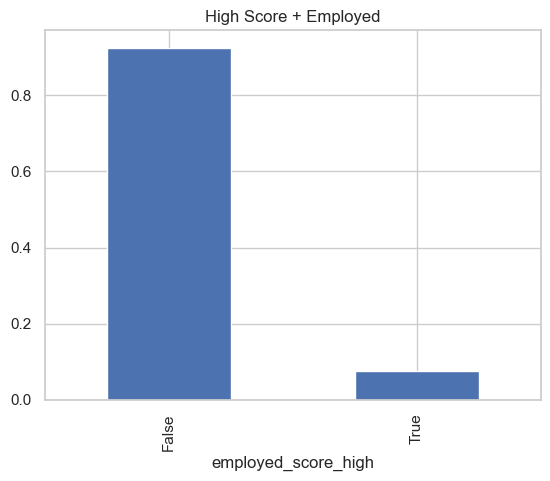

In [25]:
# 创建一个交叉变量
credit["employed_score_high"] = (credit["Employed"] == 1) & (credit["CreditScore"] > 10)
credit["employed_score_high"].value_counts(normalize=True).plot(kind="bar", title="High Score + Employed")


## 🗺️ Approval Count by Citizenship Status

This plot displays the count of credit applications by citizenship category, further broken down by approval status using color coding.

It helps identify whether different citizenship groups have different application volumes or approval outcomes, which may suggest underlying differences in access to credit.

### Key Insights:
- Certain citizenship categories (e.g., permanent residents or temporary visa holders) appear to have **lower approval ratios** relative to citizens.
- Application volume also differs by status, reflecting either population distribution or access barriers.
- This variable may carry both **predictive and policy relevance**, especially in fairness-aware modeling.


Text(0.5, 1.0, 'Approval Count by Citizenship')

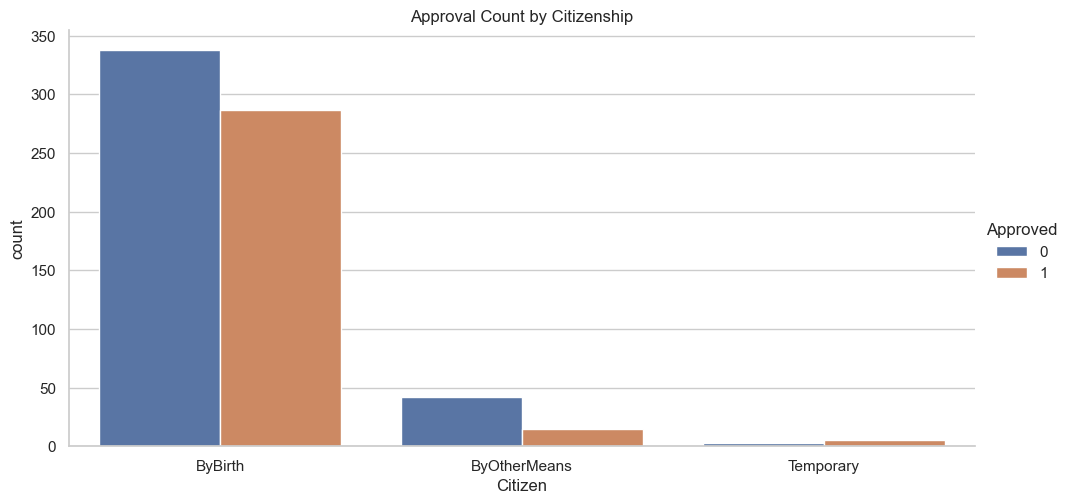

In [26]:
sns.catplot(x="Citizen", hue="Approved", data=credit, kind="count", height=5, aspect=2)
plt.title("Approval Count by Citizenship")
